In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')
import nltk

## Data Preprocessing

In [2]:
df=pd.read_csv("amazon_reviews.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1597 non-null   object 
 1   asins                 1597 non-null   object 
 2   brand                 1597 non-null   object 
 3   categories            1597 non-null   object 
 4   colors                774 non-null    object 
 5   dateAdded             1597 non-null   object 
 6   dateUpdated           1597 non-null   object 
 7   dimension             565 non-null    object 
 8   ean                   898 non-null    float64
 9   keys                  1597 non-null   object 
 10  manufacturer          965 non-null    object 
 11  manufacturerNumber    902 non-null    object 
 12  name                  1597 non-null   object 
 13  prices                1597 non-null   object 
 14  reviews.date          1217 non-null   object 
 15  reviews.doRecommend  

In [4]:
df.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [73]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')

In [5]:
df["reviews.text"]=df["reviews.text"].str.lower()

In [6]:
import re
def clean_txt(text):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\s+)|([0-9])"," ",text).split())

In [7]:
df["reviews.text"]=[str(clean_txt(x))
for x in df["reviews.text"]]

In [8]:
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [9]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))


[nltk_data] Downloading package stopwords to C:\Users\Diyotrim
[nltk_data]     Maitra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
amazonreviewswords=df["reviews.text"].str.split()

In [11]:
amazonreviewswords=amazonreviewswords.to_list()

In [12]:
from nltk import flatten
from nltk.probability import FreqDist

In [13]:
amazonreviewswords=flatten(amazonreviewswords)

In [14]:
amazonreviewswords=[w for w in amazonreviewswords if len(w)>2]

In [15]:
amazonreviewswords=[w for w in amazonreviewswords if not w in stop_words]

In [16]:
FreqDist(amazonreviewswords).most_common(100)

[('kindle', 1523),
 ('amazon', 1516),
 ('fire', 1399),
 ('like', 1247),
 ('use', 951),
 ('one', 905),
 ('read', 887),
 ('sound', 844),
 ('great', 814),
 ('headphones', 814),
 ('prime', 792),
 ('device', 780),
 ('would', 727),
 ('tablet', 711),
 ('screen', 666),
 ('apple', 642),
 ('hdx', 626),
 ('well', 616),
 ('first', 599),
 ('new', 588),
 ('really', 572),
 ('content', 571),
 ('good', 533),
 ('year', 530),
 ('nice', 522),
 ('also', 519),
 ('want', 510),
 ('review', 508),
 ('quality', 494),
 ('get', 491),
 ('time', 488),
 ('much', 473),
 ('better', 464),
 ('easy', 449),
 ('free', 423),
 ('love', 420),
 ('echo', 419),
 ('feel', 415),
 ('ipad', 406),
 ('tap', 405),
 ('product', 404),
 ('features', 396),
 ('music', 388),
 ('roku', 385),
 ('people', 377),
 ('movies', 375),
 ('even', 368),
 ('using', 360),
 ('price', 359),
 ('work', 351),
 ('think', 350),
 ('things', 349),
 ('used', 348),
 ('look', 345),
 ('still', 334),
 ('ears', 333),
 ('far', 332),
 ('never', 331),
 ('reviews', 330),
 ('

In [17]:
wordcloud=WordCloud(height=500,width=1000,
                    stopwords=stop_words).generate(str(amazonreviewswords))

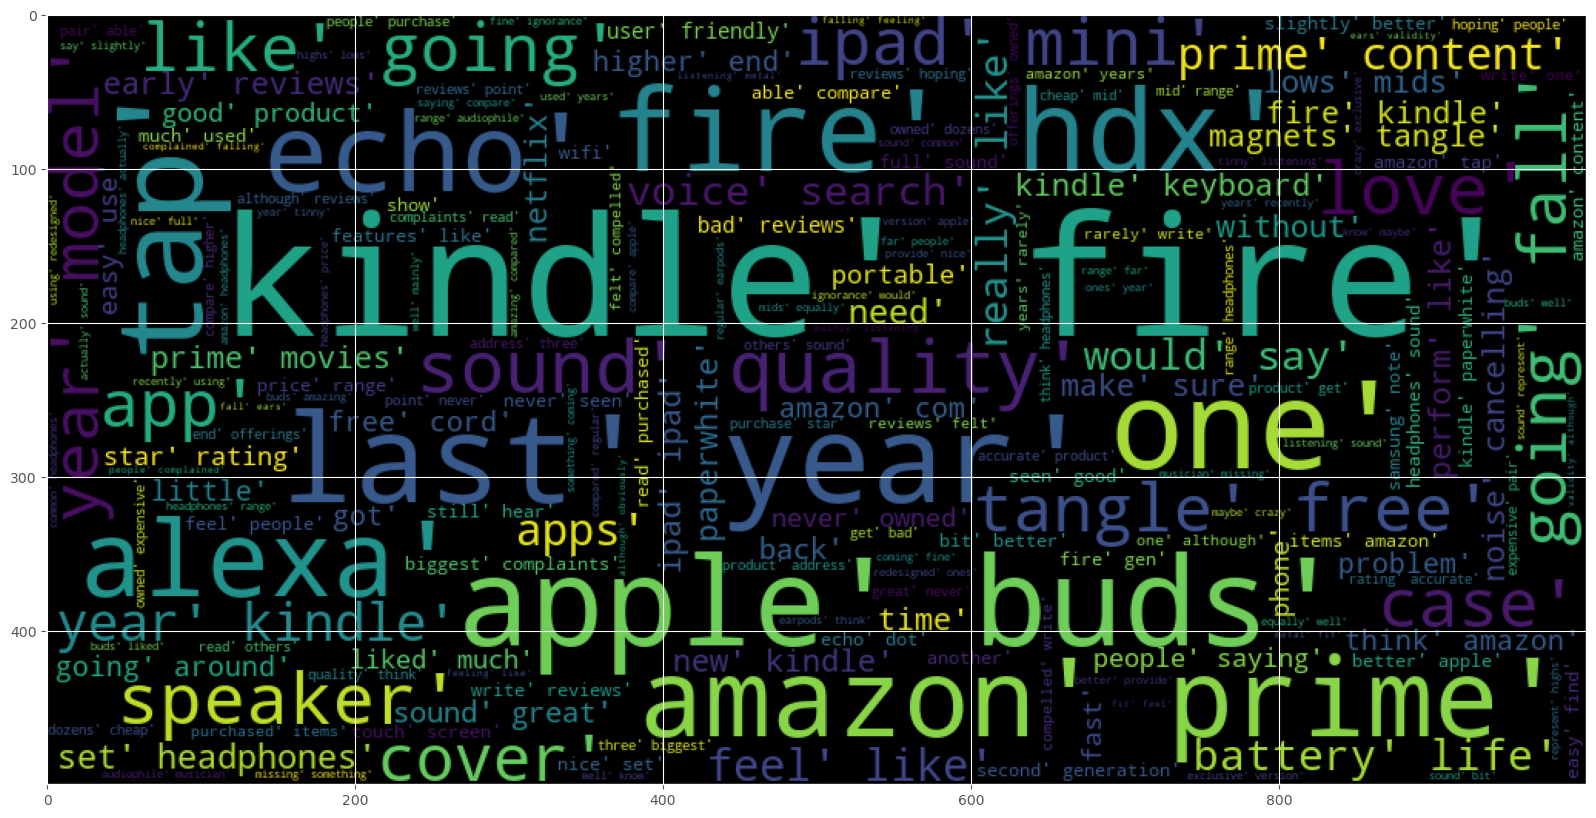

In [18]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.show()

## Model Building (Text Analysis)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
df["reviews.text"]=df["reviews.text"].apply(
    lambda x: ' '.join([w for w in x.split() if w not in stop_words]))

In [21]:
df["reviews.text"]=df["reviews.text"].apply(
    lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [22]:
tfidf=TfidfVectorizer(max_features=30,ngram_range=(1,2),stop_words="english")

In [23]:
X_tfidf=tfidf.fit_transform(df["reviews.text"])

In [24]:
X_tfidf.shape

(1597, 30)

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
y=LabelEncoder().fit_transform(df["reviews.rating"])

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logit=LogisticRegression(multi_class="multinomial")

In [29]:
logit.fit(X_tfidf,y)

LogisticRegression(multi_class='multinomial')

In [30]:
logit.score(X_tfidf,y)

0.5835942391984972

In [31]:
logitpredict=logit.predict(X_tfidf)

In [32]:
pd.crosstab(y,logitpredict)

col_0,2,3,4,5
row_0,,,,
0,1,0,35,6
1,2,1,27,4
2,39,4,55,26
3,0,15,171,50
4,4,12,576,149
5,22,3,93,302


In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
tree=DecisionTreeClassifier(max_depth=12)

In [35]:
treemodel=tree.fit(X_tfidf,y)

In [36]:
treemodel.score(X_tfidf,y)

0.7013149655604258

In [37]:
treepredict=tree.predict(X_tfidf)

In [38]:
pd.crosstab(y,treepredict)

col_0,0,1,2,3,4,5
row_0,,,,,,
0,8,0,0,4,28,2
1,0,15,0,1,18,0
2,0,1,77,8,29,9
3,0,1,0,112,93,30
4,0,0,0,38,654,49
5,1,0,21,11,133,254


In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
RF=RandomForestClassifier(n_estimators=3000)

In [41]:
RFmodel=RF.fit(X_tfidf,y)

In [42]:
RFmodel.score(X_tfidf,y)

0.7871008140262993

In [43]:
RFpredict=RF.predict(X_tfidf)

In [44]:
pd.crosstab(y,RFpredict)

col_0,0,1,2,3,4,5
row_0,,,,,,
0,24,0,0,0,17,1
1,0,19,0,1,14,0
2,0,0,95,4,15,10
3,0,0,0,146,60,30
4,0,0,0,15,660,66
5,0,0,21,12,74,313


In [45]:
from sklearn.svm import SVC

In [46]:
svm = SVC()

In [47]:
svmmodel = svm.fit(X_tfidf,y)

In [48]:
svmmodel.score(X_tfidf,y)

0.6343143393863494

In [49]:
svmpredict=svm.predict(X_tfidf)

In [50]:
pd.crosstab(y,svmpredict)

col_0,1,2,3,4,5
row_0,,,,,
0,0,0,0,38,4
1,4,0,0,26,4
2,0,49,1,55,19
3,0,0,29,160,47
4,0,0,8,640,93
5,0,21,1,107,291


In [51]:
from sklearn.naive_bayes import MultinomialNB

In [52]:
nb=MultinomialNB()

In [53]:
nbmodel=nb.fit(X_tfidf,y)

In [54]:
nbmodel.score(X_tfidf,y)

0.5666875391358798

In [55]:
nbpredict=nbmodel.predict(X_tfidf)

In [56]:
pd.crosstab(y,nbpredict)

col_0,2,4,5
row_0,,,
0,0,37,5
1,0,31,3
2,38,65,21
3,0,192,44
4,0,659,82
5,21,191,208


In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [58]:
knn=KNeighborsClassifier()

In [59]:
k_range=list(range(1,25))
param_grid=dict(n_neighbors=k_range)
grid=GridSearchCV(knn,param_grid,cv=3)

In [60]:
grid_search=grid.fit(X_tfidf,y)

In [61]:
grid_search.score(X_tfidf,y)

0.5591734502191609

In [62]:
grid_search.best_score_

0.46275750351488476

In [63]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=24)

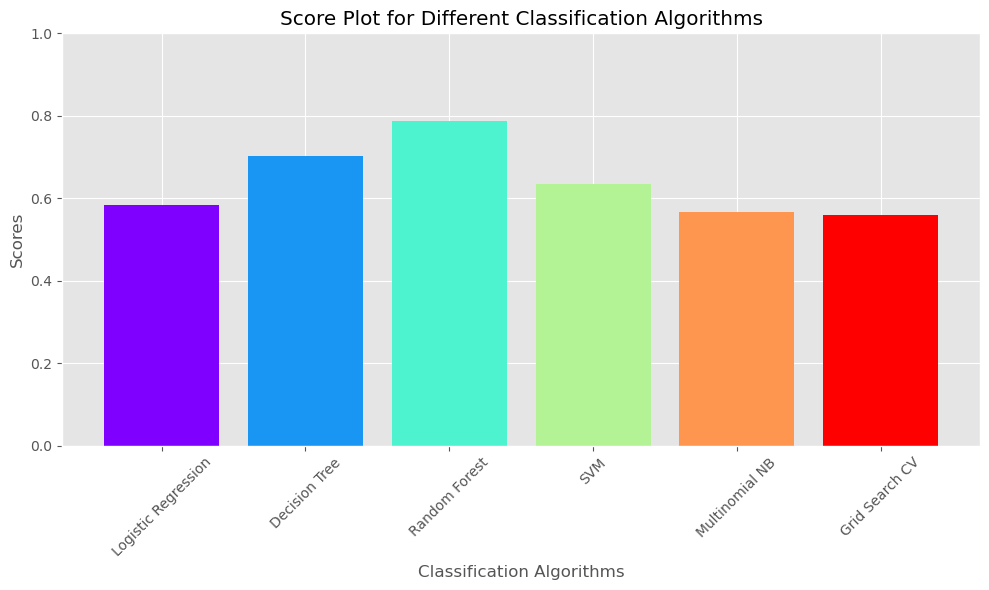

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Define the bar plot types and their corresponding scores
bar_plot_types = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Multinomial NB', 'Grid Search CV']  
scores = [0.5835942391984972, 0.7013149655604258, 0.7871008140262993, 0.6343143393863494, 0.5666875391358798, 0.5591734502191609]  

# Create a color map for the rainbow effect
colors = plt.cm.rainbow(np.linspace(0, 1, len(bar_plot_types)))

# Create the bar plot with rainbow colors
plt.figure(figsize=(10, 6))
bars = plt.bar(bar_plot_types, scores, color=colors)

# Add labels and title
plt.xlabel('Classification Algorithms')
plt.ylabel('Scores')
plt.title('Score Plot for Different Classification Algorithms')

# Display the plot
plt.ylim(0, 1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


## Model Building (Sentiment Analysis)

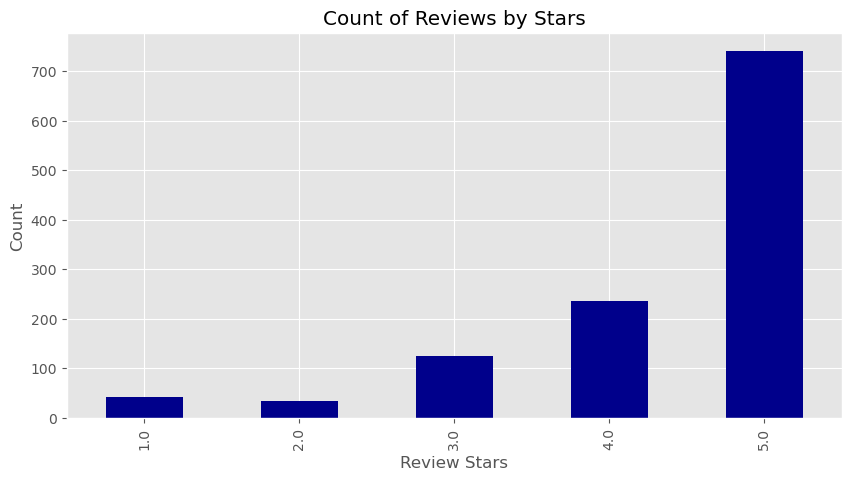

In [65]:
# Count the occurrences of each star rating
star_counts = df['reviews.rating'].value_counts().sort_index()

# Create a bar plot
bar_plot = star_counts.plot(kind='bar', title='Count of Reviews by Stars', figsize=(10, 5), color='darkblue')

# Set labels
bar_plot.set_xlabel('Review Stars')
bar_plot.set_ylabel('Count')

# Show the plot
plt.show()

In [66]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

dm= SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to C:\Users\Diyotrim
[nltk_data]     Maitra\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [67]:
dm.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [68]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text=row['reviews.text']
    myid=row['id']
    res[myid]= dm.polarity_scores(text)

  0%|          | 0/1597 [00:00<?, ?it/s]

In [69]:
sent=pd.DataFrame(res).T
sent=sent.reset_index().rename(columns={'index':'id'})
sent= sent.merge(df, how='left')

In [70]:
sent.head()

,id,neg,neu,pos,compound,asins,brand,categories,colors,dateAdded,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,0.0,0.558,0.442,0.8834,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,initially trouble deciding paperwhite voyage r...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,0.0,0.558,0.442,0.8834,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,allow preface little history casual reader own...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,0.0,0.558,0.442,0.8834,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,enjoying far great reading original fire since...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,0.0,0.558,0.442,0.8834,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,bought one first paperwhites pleased constant ...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,0.0,0.558,0.442,0.8834,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,say upfront like coroporate hermetically close...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


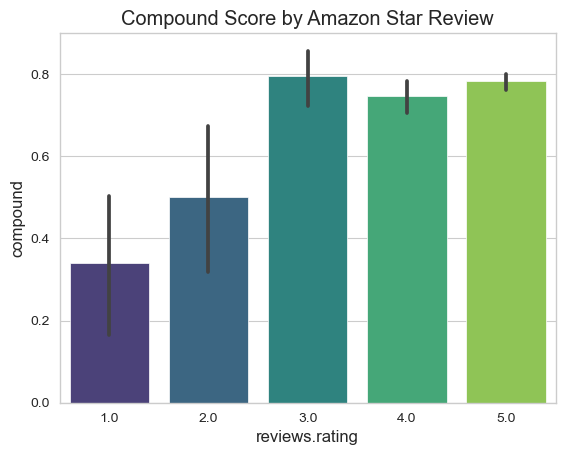

In [71]:
sns.set_style("whitegrid")

# Create the barplot with 'viridis' colormap
ax = sns.barplot(data=sent, x='reviews.rating', y='compound', palette='viridis')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

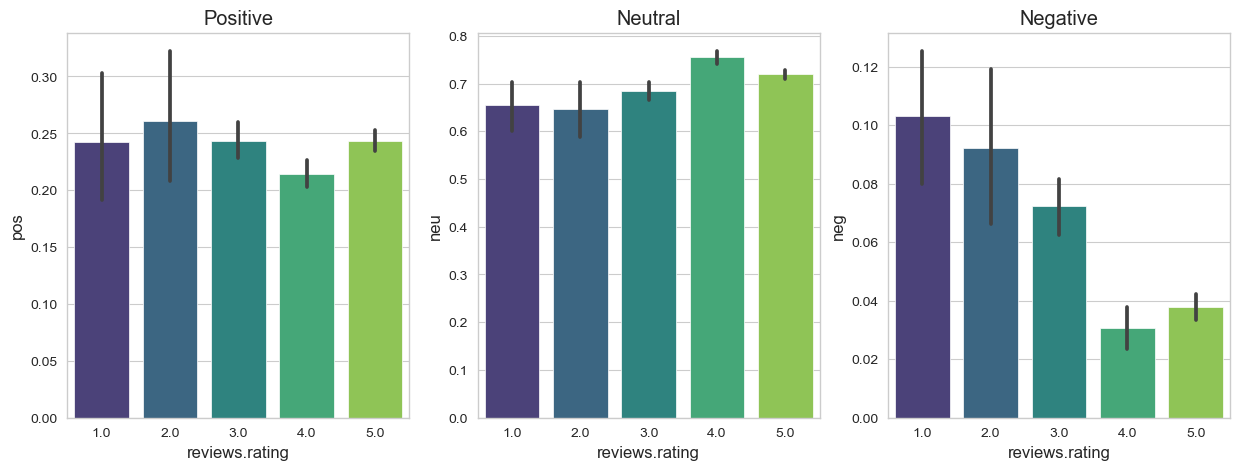

In [72]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.barplot(data=sent, x='reviews.rating', y='pos', ax=axs[0], palette='viridis')
sns.barplot(data=sent, x='reviews.rating', y='neu', ax=axs[1], palette='viridis')
sns.barplot(data=sent, x='reviews.rating', y='neg', ax=axs[2], palette='viridis')
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()
